In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
df1 = pd.read_csv('data_irregularities_yes_1.csv')
df1.head()

,requestor,goods_services,supplier,award_date,award_amount
0,requestor_a,maintain_facilities_a,supplier_a,1-Jan-24,150000.0000
1,requestor_a,maintain_facilities_a,supplier_b,1-Jan-24,150000.0000
2,requestor_a,maintain_facilities_a,supplier_c,1-Jan-24,109847.7126
3,requestor_a,maintain_facilities_a,supplier_a,1-Apr-24,150000.0000
4,requestor_a,maintain_facilities_a,supplier_b,1-Apr-24,150000.0000


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   requestor       48 non-null     object 
 1   goods_services  48 non-null     object 
 2   supplier        48 non-null     object 
 3   award_date      48 non-null     object 
 4   award_amount    48 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB


In [4]:
df1['award_date_formatted'] = pd.to_datetime(df1['award_date'], format='%d-%b-%y', errors='coerce')
df1.head()

,requestor,goods_services,supplier,award_date,award_amount,award_date_formatted
0,requestor_a,maintain_facilities_a,supplier_a,1-Jan-24,150000.0000,2024-01-01
1,requestor_a,maintain_facilities_a,supplier_b,1-Jan-24,150000.0000,2024-01-01
2,requestor_a,maintain_facilities_a,supplier_c,1-Jan-24,109847.7126,2024-01-01
3,requestor_a,maintain_facilities_a,supplier_a,1-Apr-24,150000.0000,2024-04-01
4,requestor_a,maintain_facilities_a,supplier_b,1-Apr-24,150000.0000,2024-04-01


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   requestor             48 non-null     object        
 1   goods_services        48 non-null     object        
 2   supplier              48 non-null     object        
 3   award_date            48 non-null     object        
 4   award_amount          48 non-null     float64       
 5   award_date_formatted  48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.4+ KB


In [6]:
df2 = pd.pivot(df1, index=['requestor','goods_services','award_date'], columns='supplier', values='supplier')
df2.head()

supplier                                      supplier_a  supplier_b  \
requestor   goods_services        award_date                           
requestor_a maintain_facilities_a 1-Apr-24    supplier_a  supplier_b   
                                  1-Jan-24    supplier_a  supplier_b   
                                  1-Jul-24    supplier_a  supplier_b   
                                  1-Oct-24    supplier_a  supplier_b   
requestor_b maintain_facilities_b 1-Apr-24           NaN         NaN   

supplier                                      supplier_c  supplier_d  \
requestor   goods_services        award_date                           
requestor_a maintain_facilities_a 1-Apr-24           NaN         NaN   
                                  1-Jan-24    supplier_c         NaN   
                                  1-Jul-24           NaN         NaN   
                                  1-Oct-24           NaN         NaN   
requestor_b maintain_facilities_b 1-Apr-24           NaN  supplier_d   

supplier                                      supplier_e  supplier_f  \
requestor   goods_services        award_date                           
requestor_a maintain_facilities_a 1-Apr-24           NaN  supplier_f   
                                  1-Jan-24           NaN         NaN   
                                  1-Jul-24           NaN         NaN   
                                  1-Oct-24           NaN         NaN   
requestor_b maintain_facilities_b 1-Apr-24    supplier_e  supplier_f   

supplier                                     supplier_g supplier_h  \
requestor   goods_services        award_date                         
requestor_a maintain_facilities_a 1-Apr-24          NaN        NaN   
                                  1-Jan-24          NaN        NaN   
                                  1-Jul-24          NaN        NaN   
                                  1-Oct-24          NaN        NaN   
requestor_b maintain_facilities_b 1-Apr-24          NaN        NaN   

supplier                                      supplier_i supplier_j  \
requestor   goods_services        award_date                          
requestor_a maintain_facilities_a 1-Apr-24           NaN        NaN   
                                  1-Jan-24           NaN        NaN   
                                  1-Jul-24    supplier_i        NaN   
                                  1-Oct-24           NaN        NaN   
requestor_b maintain_facilities_b 1-Apr-24           NaN        NaN   

supplier                                     supplier_k  supplier_l  
requestor   goods_services        award_date                         
requestor_a maintain_facilities_a 1-Apr-24          NaN         NaN  
                                  1-Jan-24          NaN         NaN  
                                  1-Jul-24          NaN         NaN  
                                  1-Oct-24          NaN  supplier_l  
requestor_b maintain_facilities_b 1-Apr-24          NaN         NaN

In [7]:
df3 = pd.DataFrame(df2.to_records())
df3.head()

,requestor,goods_services,award_date,supplier_a,supplier_b,supplier_c,supplier_d,supplier_e,supplier_f,supplier_g,supplier_h,supplier_i,supplier_j,supplier_k,supplier_l
0,requestor_a,maintain_facilities_a,1-Apr-24,supplier_a,supplier_b,NaN,NaN,NaN,supplier_f,NaN,NaN,NaN,NaN,NaN,NaN
1,requestor_a,maintain_facilities_a,1-Jan-24,supplier_a,supplier_b,supplier_c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,requestor_a,maintain_facilities_a,1-Jul-24,supplier_a,supplier_b,NaN,NaN,NaN,NaN,NaN,NaN,supplier_i,NaN,NaN,NaN
3,requestor_a,maintain_facilities_a,1-Oct-24,supplier_a,supplier_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,supplier_l
4,requestor_b,maintain_facilities_b,1-Apr-24,NaN,NaN,NaN,supplier_d,supplier_e,supplier_f,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df4 = df3.iloc[:,3:].notna()
df4.head()

,supplier_a,supplier_b,supplier_c,supplier_d,supplier_e,supplier_f,supplier_g,supplier_h,supplier_i,supplier_j,supplier_k,supplier_l
0,True,True,False,False,False,True,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,True,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,True,True,False,False,False,False,False,False


In [9]:
df5 = pd.concat([df3.iloc[:,:3], df4], axis=1)
df5.head()

,requestor,goods_services,award_date,supplier_a,supplier_b,supplier_c,supplier_d,supplier_e,supplier_f,supplier_g,supplier_h,supplier_i,supplier_j,supplier_k,supplier_l
0,requestor_a,maintain_facilities_a,1-Apr-24,True,True,False,False,False,True,False,False,False,False,False,False
1,requestor_a,maintain_facilities_a,1-Jan-24,True,True,True,False,False,False,False,False,False,False,False,False
2,requestor_a,maintain_facilities_a,1-Jul-24,True,True,False,False,False,False,False,False,True,False,False,False
3,requestor_a,maintain_facilities_a,1-Oct-24,True,True,False,False,False,False,False,False,False,False,False,True
4,requestor_b,maintain_facilities_b,1-Apr-24,False,False,False,True,True,True,False,False,False,False,False,False


In [10]:
df6 = apriori(df5.iloc[:,3:], min_support=0.1, use_colnames=True)
df6

,support,itemsets
0,0.4375,(supplier_a)
1,0.4375,(supplier_b)
2,0.2500,(supplier_c)
3,0.1875,(supplier_d)
4,0.1875,(supplier_e)
5,0.2500,(supplier_f)
6,0.1875,(supplier_g)
7,0.1875,(supplier_h)
8,0.2500,(supplier_i)
9,0.1875,(supplier_j)


In [11]:
df7 = association_rules(df6, metric='confidence', min_threshold=0.1, support_only=False)
df7 = df7.sort_values(['confidence','lift'], ascending=[False,False])
df7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(supplier_d),(supplier_e),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
7,(supplier_e),(supplier_d),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
12,(supplier_g),(supplier_h),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
13,(supplier_h),(supplier_g),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
18,(supplier_j),(supplier_k),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
19,(supplier_k),(supplier_j),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
30,"(supplier_f, supplier_d)",(supplier_e),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
31,"(supplier_f, supplier_e)",(supplier_d),0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
34,(supplier_d),"(supplier_f, supplier_e)",0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
35,(supplier_e),"(supplier_f, supplier_d)",0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000


In [12]:
df7['antecedents'] = df7['antecedents'].apply(lambda x: list(x))
df7['consequents'] = df7['consequents'].apply(lambda x: list(x))
df7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,[supplier_d],[supplier_e],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
7,[supplier_e],[supplier_d],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
12,[supplier_g],[supplier_h],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
13,[supplier_h],[supplier_g],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
18,[supplier_j],[supplier_k],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
19,[supplier_k],[supplier_j],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
30,"[supplier_f, supplier_d]",[supplier_e],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
31,"[supplier_f, supplier_e]",[supplier_d],0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
34,[supplier_d],"[supplier_f, supplier_e]",0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
35,[supplier_e],"[supplier_f, supplier_d]",0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000


In [13]:
df7['antecedents'] = df7['antecedents'].apply(lambda x: ', '.join(x))
df7['consequents'] = df7['consequents'].apply(lambda x: ', '.join(x))
df7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,supplier_d,supplier_e,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
7,supplier_e,supplier_d,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
12,supplier_g,supplier_h,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
13,supplier_h,supplier_g,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
18,supplier_j,supplier_k,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
19,supplier_k,supplier_j,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
30,"supplier_f, supplier_d",supplier_e,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
31,"supplier_f, supplier_e",supplier_d,0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
34,supplier_d,"supplier_f, supplier_e",0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000
35,supplier_e,"supplier_f, supplier_d",0.1875,0.1875,0.1875,1.000000,5.333333,0.152344,inf,1.000000


In [14]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 6 to 28
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         48 non-null     object 
 1   consequents         48 non-null     object 
 2   antecedent support  48 non-null     float64
 3   consequent support  48 non-null     float64
 4   support             48 non-null     float64
 5   confidence          48 non-null     float64
 6   lift                48 non-null     float64
 7   leverage            48 non-null     float64
 8   conviction          48 non-null     float64
 9   zhangs_metric       48 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.1+ KB


In [15]:
G = nx.Graph()

In [16]:
for item in df7['antecedents']:
    G.add_node(item)
for item in df7['consequents']:
    G.add_node(item)

In [17]:
for idx, row in df7.iterrows():
    # G.add_edge(row['antecedents']), row['consequents']), label=f"Confidence: {row['confidence']:.2f}")
    G.add_edge(row['antecedents'], row['consequents'])

In [18]:
pos = nx.spring_layout(G, k=1)

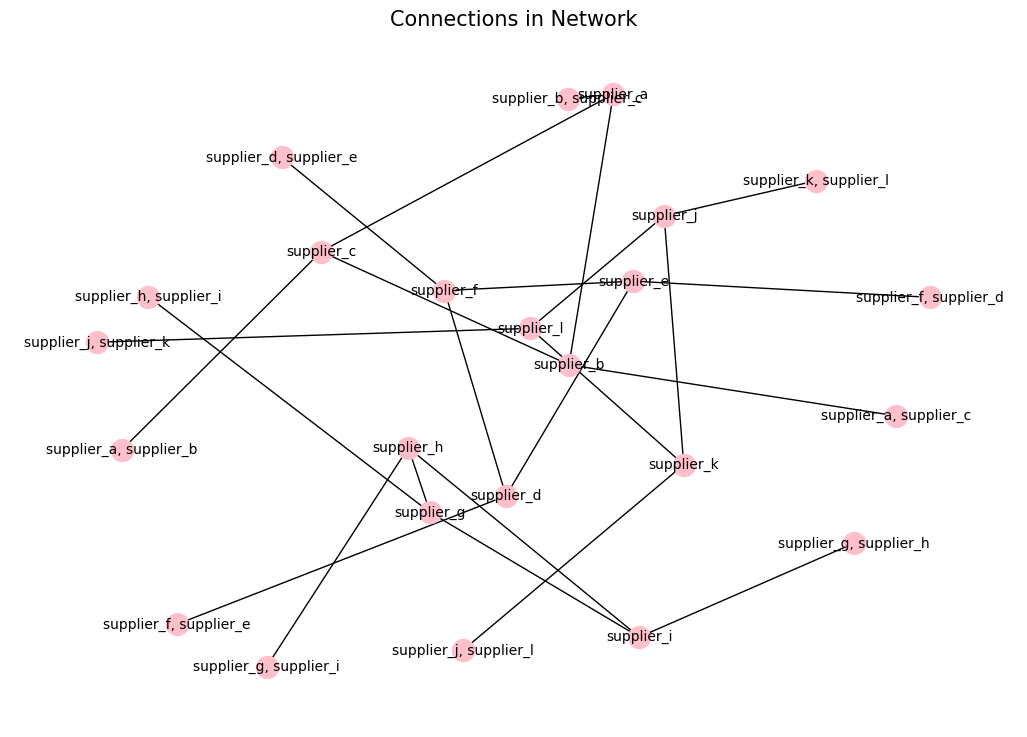

In [19]:
fig, ax = plt.subplots(figsize=(13,9))
# edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=250, node_color='pink', font_size=10)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Connections in Network", fontsize=15)
plt.show()

Community 1: {'supplier_h, supplier_i', 'supplier_g', 'supplier_i', 'supplier_g, supplier_h', 'supplier_g, supplier_i', 'supplier_h'}
Number of nodes: 6

Community 2: {'supplier_j, supplier_k', 'supplier_j, supplier_l', 'supplier_l', 'supplier_j', 'supplier_k, supplier_l', 'supplier_k'}
Number of nodes: 6

Community 3: {'supplier_f, supplier_d', 'supplier_f, supplier_e', 'supplier_d', 'supplier_d, supplier_e', 'supplier_f', 'supplier_e'}
Number of nodes: 6

Community 4: {'supplier_a', 'supplier_a, supplier_c', 'supplier_b', 'supplier_c', 'supplier_b, supplier_c', 'supplier_a, supplier_b'}
Number of nodes: 6


Graph with communities marked:



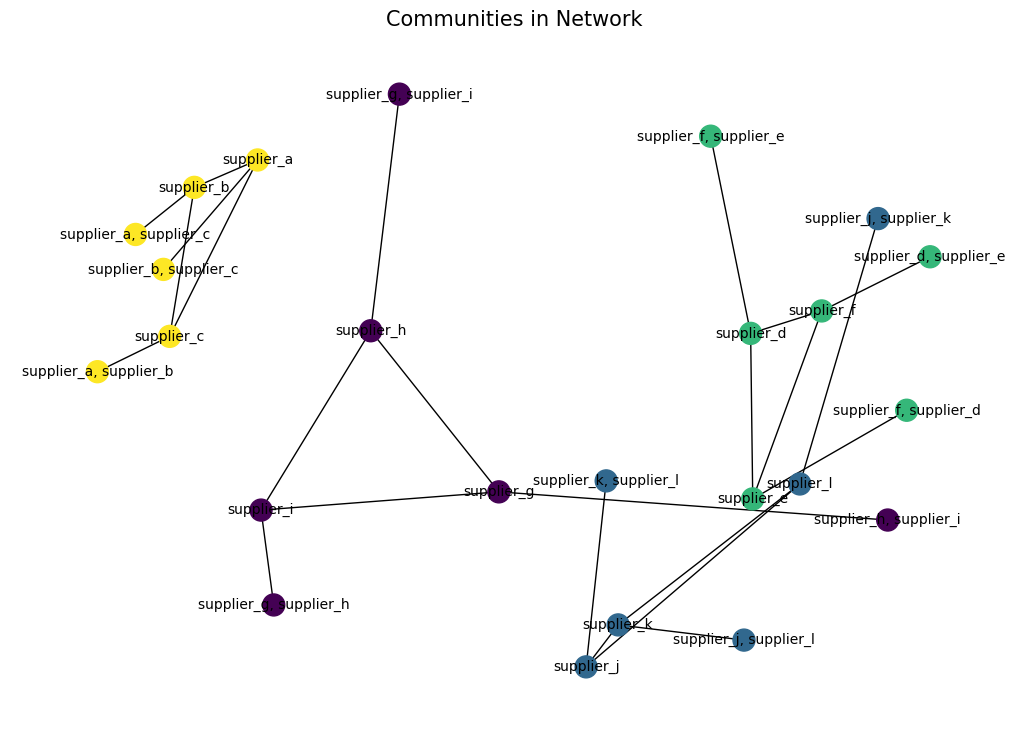

In [20]:
# community identification using Louvain algorithm
communities = nx.community.louvain_communities(G, seed=42)

# print the communities and the number of nodes in each community
i = 1
for c in communities:
    print(f'Community {i}: {c}')
    i = i + 1
    print(f'Number of nodes: {len(c)}')
    print()
print()

color_map = []
for node in G.nodes():
    for i in range(len(communities)):
        if node in communities[i]:
            color_map.append(i)

print("Graph with communities marked:")
print()

fig, ax = plt.subplots(figsize=(13,9))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, node_color=color_map, with_labels=True, font_size=10, node_size=250)
plt.title("Communities in Network", fontsize=15)
plt.show()